In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/googleplaystore.csv')

In [28]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [30]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Preprocessing of Data

In [31]:
df.duplicated().sum()

np.int64(483)

In [32]:
df.drop_duplicates(inplace=True)


In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [35]:
df['Reviews'].dtype

dtype('O')

In [36]:
df1=df.copy()

In [37]:
df1.reset_index(drop=True,inplace=True)

In [38]:
df1[~df1.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [39]:
df1=df1.drop(index=9990)

In [40]:
df1[~df1.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [41]:
df1["Reviews"]=df1['Reviews'].astype(int)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [43]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [44]:
def size_process(item):
  if str(item)[-1]=='M':
    res=float(str(item).replace('M',' '))
    res=res*1024
    return res
  elif str(item)[-1]=='k':
    res=float(str(item).replace('k',' '))
    return res
  else:
    return str(np.nan)

In [45]:
df1['Size']=df1['Size'].apply(size_process)

In [46]:
df1.Size.dtype

dtype('O')

In [47]:
df1.Size=df1.Size.astype('float')

In [48]:
df1.Size.dtype

dtype('float64')

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [50]:
df1.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [51]:
df1['Installs'] = df1['Installs'].str.replace('+','', regex=False).str.replace(',','', regex=False)

In [52]:
df1['Installs']=df1['Installs'].astype(int)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [54]:
df1.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [55]:
df1['Price'] = df1['Price'].str.replace('$','', regex=False)

In [56]:
df1['Price']=df1['Price'].astype(float)

In [57]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [58]:
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])

In [59]:
df1['day']=df1['Last Updated'].dt.day
df1['month']=df1['Last Updated'].dt.month
df1['year']=df1['Last Updated'].dt.year

In [60]:
df1.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [61]:
df1.drop('Last Updated',axis=1,inplace=True)

In [62]:
df1['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [63]:
df1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [64]:
df1['Android Ver']=df1['Android Ver'].str.replace(' and up','').str.replace('Varies with device','')

In [65]:
df1[df1.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
260,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0.3,26,2,2018
261,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35840.0,100000000,Free,0.0,Everyone,Business,9.7.14188,4.1,2,8,2018
262,Slack,BUSINESS,4.4,51510,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,,2,8,2018
348,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,Varies with device,,1,8,2018
349,imo free video calls and chat,COMMUNICATION,4.3,4785988,11264.0,500000000,Free,0.0,Everyone,Communication,9.8.000000010501,4.0,8,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,NaN,100000000,Free,0.0,Everyone,Video Players & Editors,Varies with device,,2,5,2018
10233,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,25,2,2016
10238,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
10248,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,24,3,2018


In [66]:
df1=df1.drop_duplicates(subset="App",keep="first")

In [67]:
df1[df1.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Current Ver     9651 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  day             9659 non-null   int32  
 13  month           9659 non-null   int32  
 14  year            9659 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.1+ MB


In [70]:
df1.isnull().sum()

,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [71]:
df1.dropna(inplace=True)

# Exploratory Data Analysis

In [73]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'day', 'month', 'year'],
      dtype='object')

In [75]:
categorical_features=[feature for feature in df1.columns if df1[feature].dtype=='O']

In [76]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [77]:
numerical_features=[feature for feature in df1.columns if df1[feature].dtype!='O']

In [78]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

In [79]:
#for categorical features>> Frequency Plot,Bar Chart,Pie Chart....
#for numerical features>> Histogram,Dist Plot,Box Plot ,Line Chart ,Scatterplot.....

In [85]:
for col in categorical_features:
  print(f"{col}:{df1[col].value_counts(normalize=True)*100}")

App:App
iHoroscope - 2018 Daily Horoscope & Astrology         0.014243
Photo Editor & Candy Camera & Grid & ScrapBook        0.014243
Coloring book moana                                   0.014243
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.014243
Sketch - Draw & Paint                                 0.014243
                                                        ...   
FlipaClip - Cartoon animation                         0.014243
350 Diy Room Decor Ideas                              0.014243
Photo Designer - Write your name with shapes          0.014243
3D Color Pixel by Number - Sandbox Art Coloring       0.014243
Mandala Coloring Book                                 0.014243
Name: proportion, Length: 7021, dtype: float64
Category:Category
FAMILY                 21.521151
GAME                   11.850164
TOOLS                   8.901866
PERSONALIZATION         3.902578
LIFESTYLE               3.831363
MEDICAL                 3.788634
FINANCE                 3.674690
PRO

<Axes: xlabel='Type', ylabel='count'>

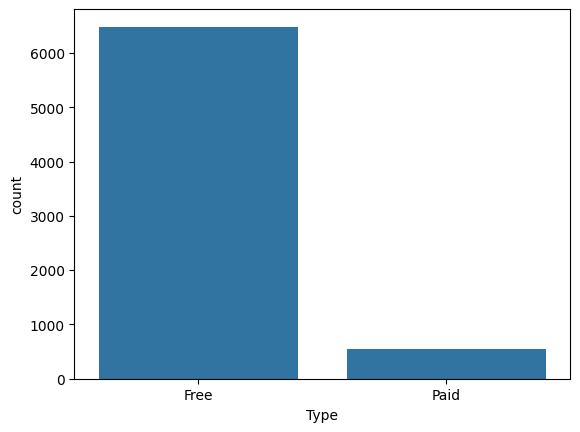

In [86]:
sns.countplot(x=df1['Type'])

In [80]:
df['Type'].value_counts(normalize=True)*100

,proportion
Type,
Free,92.604036
Paid,7.386309
0,0.009655


# Approx 93% apps are free and 7% are paid



---



<Axes: xlabel='Content Rating', ylabel='count'>

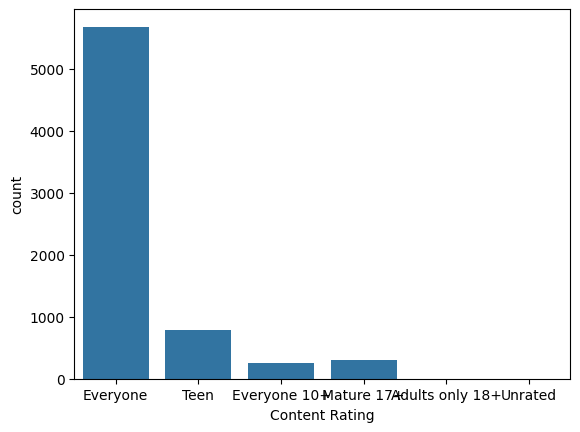

In [88]:
sns.countplot(x=df1['Content Rating'])


In [89]:
df1['Content Rating'].value_counts(normalize=True)*100

,proportion
Content Rating,
Everyone,80.843185
Teen,11.095286
Mature 17+,4.329868
Everyone 10+,3.688933
Adults only 18+,0.028486
Unrated,0.014243


# Maximum Apps are Available for everyone i.e. approx 83%



---



In [95]:
#Question >> How many apps belongs to each category

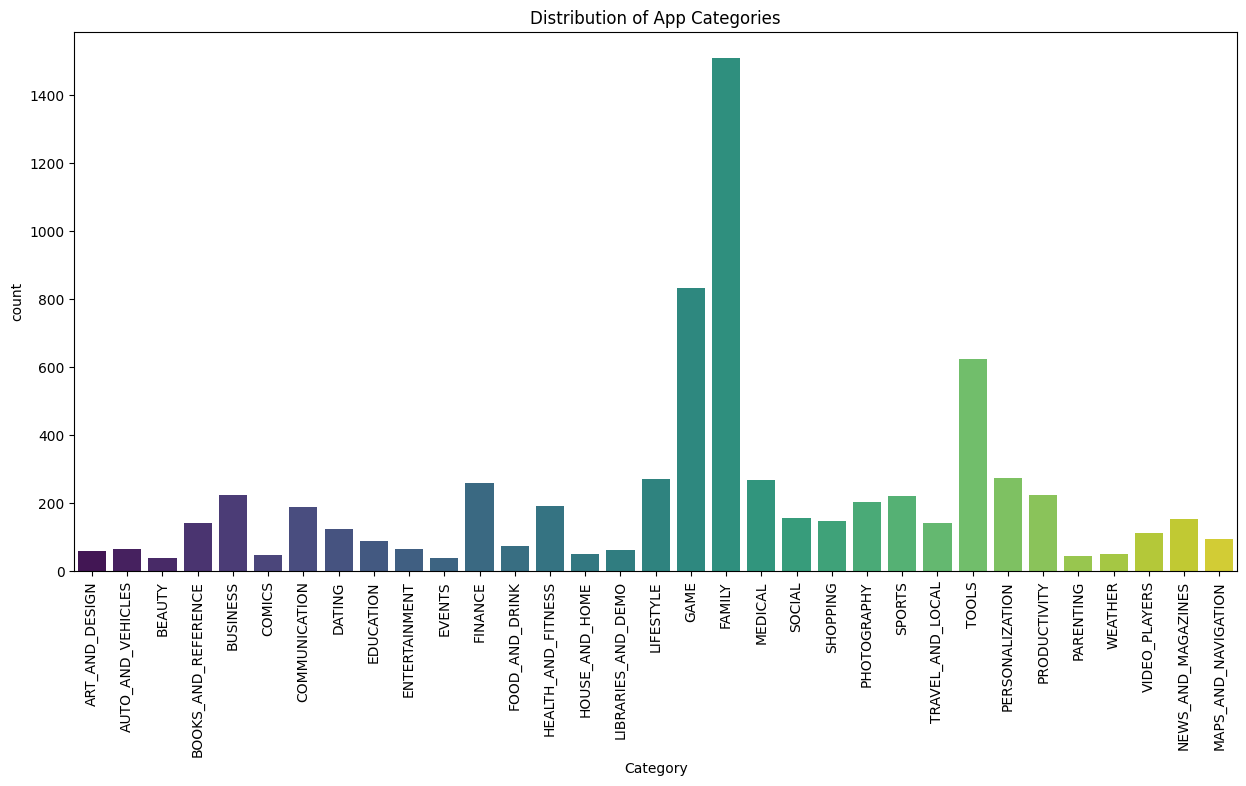

In [98]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Category', data=df1, hue='Category', legend=False, palette='viridis')
plt.title('Distribution of App Categories')
plt.xticks(rotation=90)
plt.show()

# The 'FAMILY' and 'GAME' categories have the highest number of apps.



---



In [99]:
#Which top 10 Categories have the highest number of apps?

In [100]:
top_10_categories = df1['Category'].value_counts().head(10)
display(top_10_categories)

,count
Category,
FAMILY,1511
GAME,832
TOOLS,625
PERSONALIZATION,274
LIFESTYLE,269
MEDICAL,266
FINANCE,258
PRODUCTIVITY,223
BUSINESS,222


# The top 10 app categories are led by 'FAMILY' and 'GAME', indicating their dominance in the dataset.



---



In [ ]:
#Which Categories dominate within each Content Rating group?

<Figure size 1800x1000 with 0 Axes>

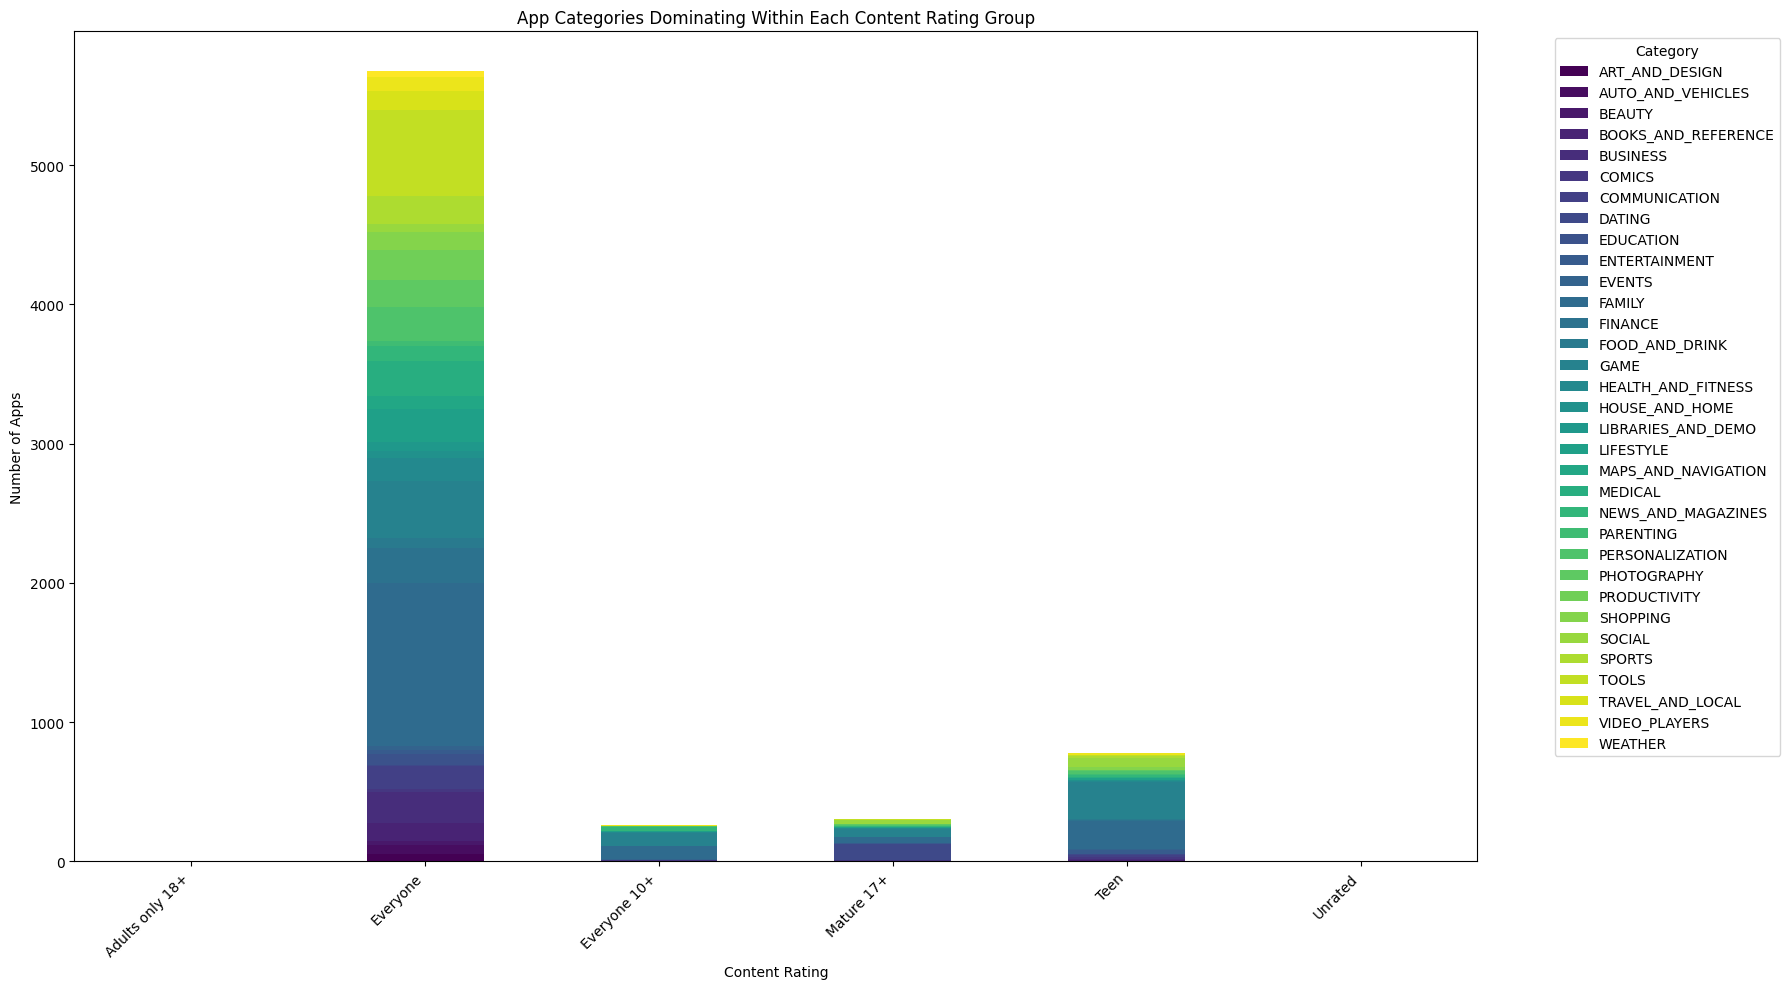

In [101]:
category_content_rating = df1.groupby(['Content Rating', 'Category']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(18, 10))
category_content_rating.plot(kind='bar', stacked=True, figsize=(18,10), cmap='viridis')
plt.title('App Categories Dominating Within Each Content Rating Group')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# The 'Everyone' content rating primarily features 'FAMILY' and 'GAME' apps, while 'Mature 17+' and 'Adults only 18+' are dominated by 'DATING' and 'COMMUNICATION' apps.

In [104]:
#How are apps distributed across different Genres, Top 10?

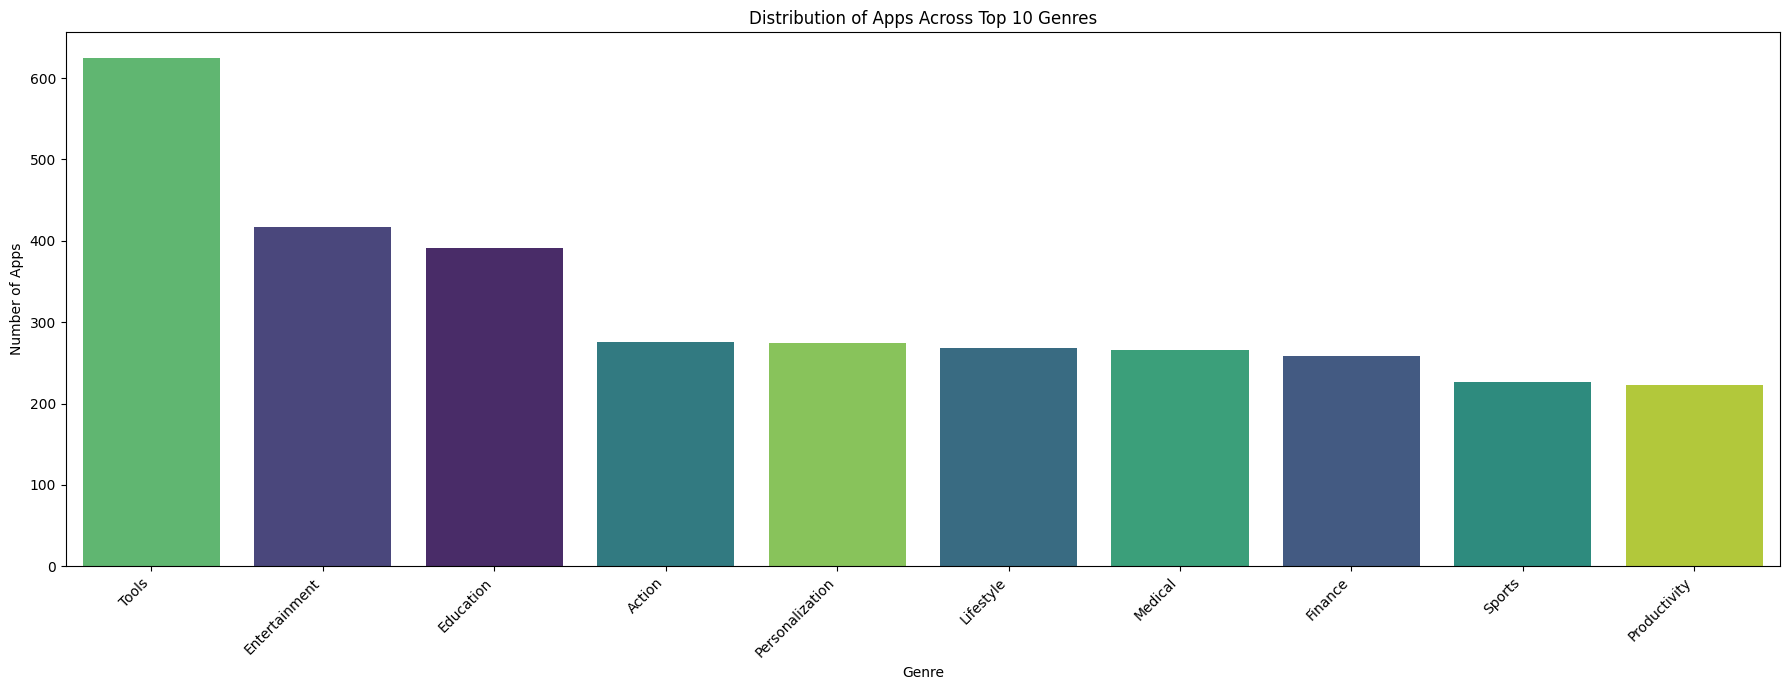

In [105]:
top_10_genres = df1['Genres'].value_counts().head(10).index
df_top10_genres = df1[df1['Genres'].isin(top_10_genres)]

plt.figure(figsize=(18, 7))
sns.countplot(x='Genres', data=df_top10_genres, hue='Genres', legend=False, palette='viridis', order=top_10_genres)
plt.title('Distribution of Apps Across Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Among the top 10 genres, 'Tools' is the most popular, followed closely by 'Entertainment' and 'Education', highlighting their significant presence in the app market.



---



In [ ]:
#Which Categories have the highest number of Paid apps?

#Which Categories have the highest number of Free apps?

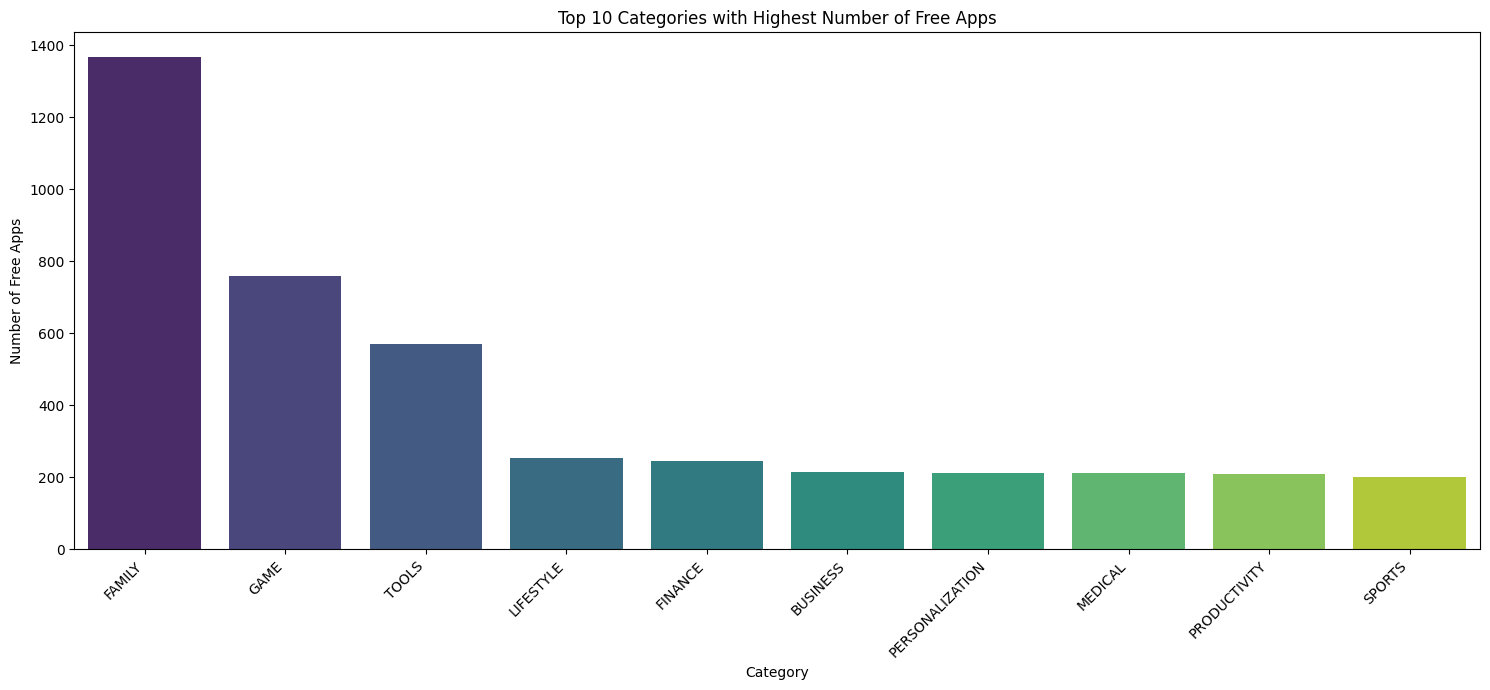

In [107]:
free_apps = df1[df1['Type'] == 'Free']
top_free_categories = free_apps['Category'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=top_free_categories.index, y=top_free_categories.values, hue=top_free_categories.index, legend=False, palette='viridis')
plt.title('Top 10 Categories with Highest Number of Free Apps')
plt.xlabel('Category')
plt.ylabel('Number of Free Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The 'FAMILY', 'GAME', and 'TOOLS' categories dominate the landscape of free applications, much like their prominence in paid apps.

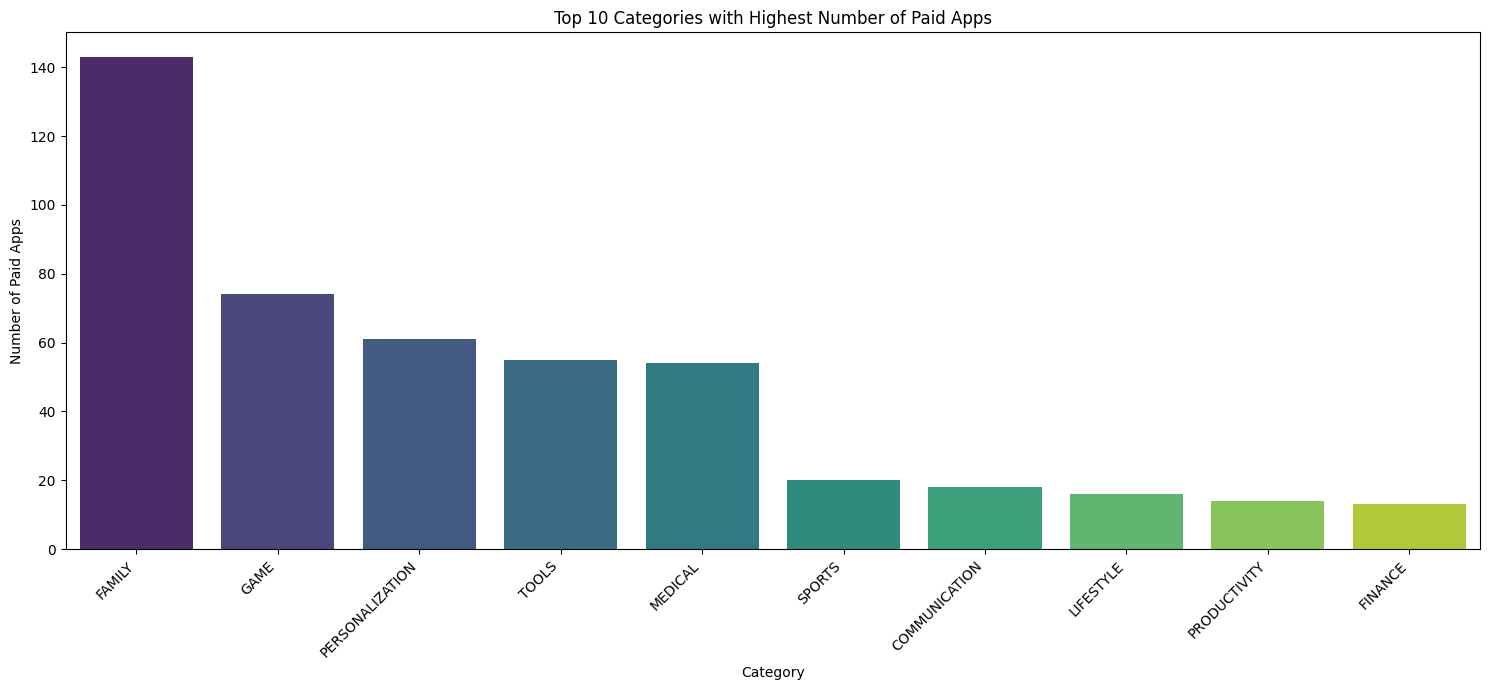

In [106]:
paid_apps = df1[df1['Type'] == 'Paid']
top_paid_categories = paid_apps['Category'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=top_paid_categories.index, y=top_paid_categories.values, hue=top_paid_categories.index, legend=False, palette='viridis')
plt.title('Top 10 Categories with Highest Number of Paid Apps')
plt.xlabel('Category')
plt.ylabel('Number of Paid Apps')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The 'FAMILY', 'MEDICAL', and 'GAME' categories have the highest number of paid applications.



---



In [109]:
#How does app availability vary across Categories and Type (Free/Paid)?

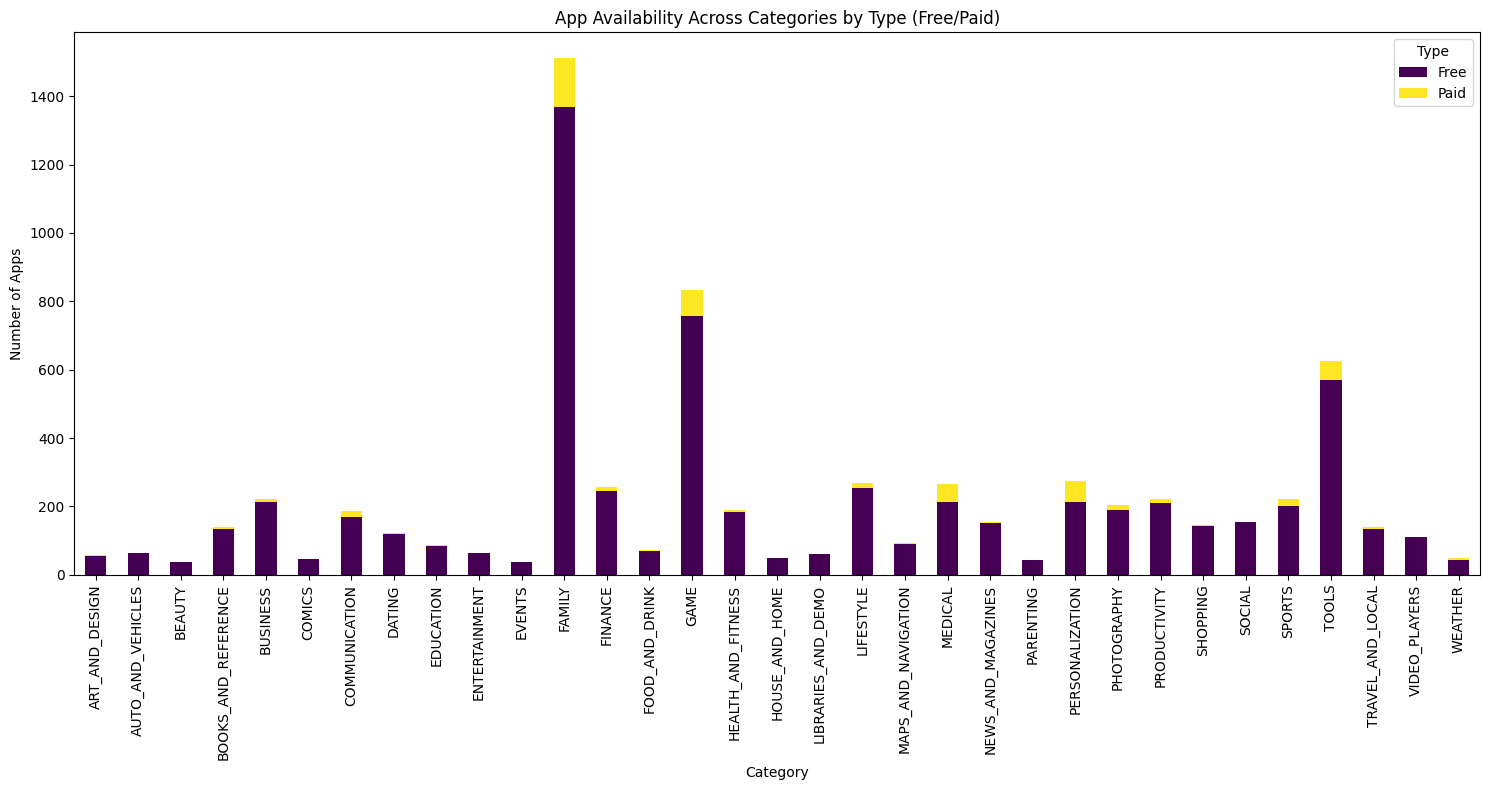

In [111]:
category_type_counts = df1.groupby(['Category', 'Type']).size().unstack(fill_value=0)

category_type_counts.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='viridis')
plt.title('App Availability Across Categories by Type (Free/Paid)')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## Across most categories, free applications significantly outnumber paid applications, with 'FAMILY' and 'GAME' categories having the highest counts for both types.



---



/tmp/ipython-input-1799554324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[Category[i]],palette="Set2")
/tmp/ipython-input-1799554324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[Category[i]],palette="Set2")
/tmp/ipython-input-1799554324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1[Category[i]],palette="Set2")


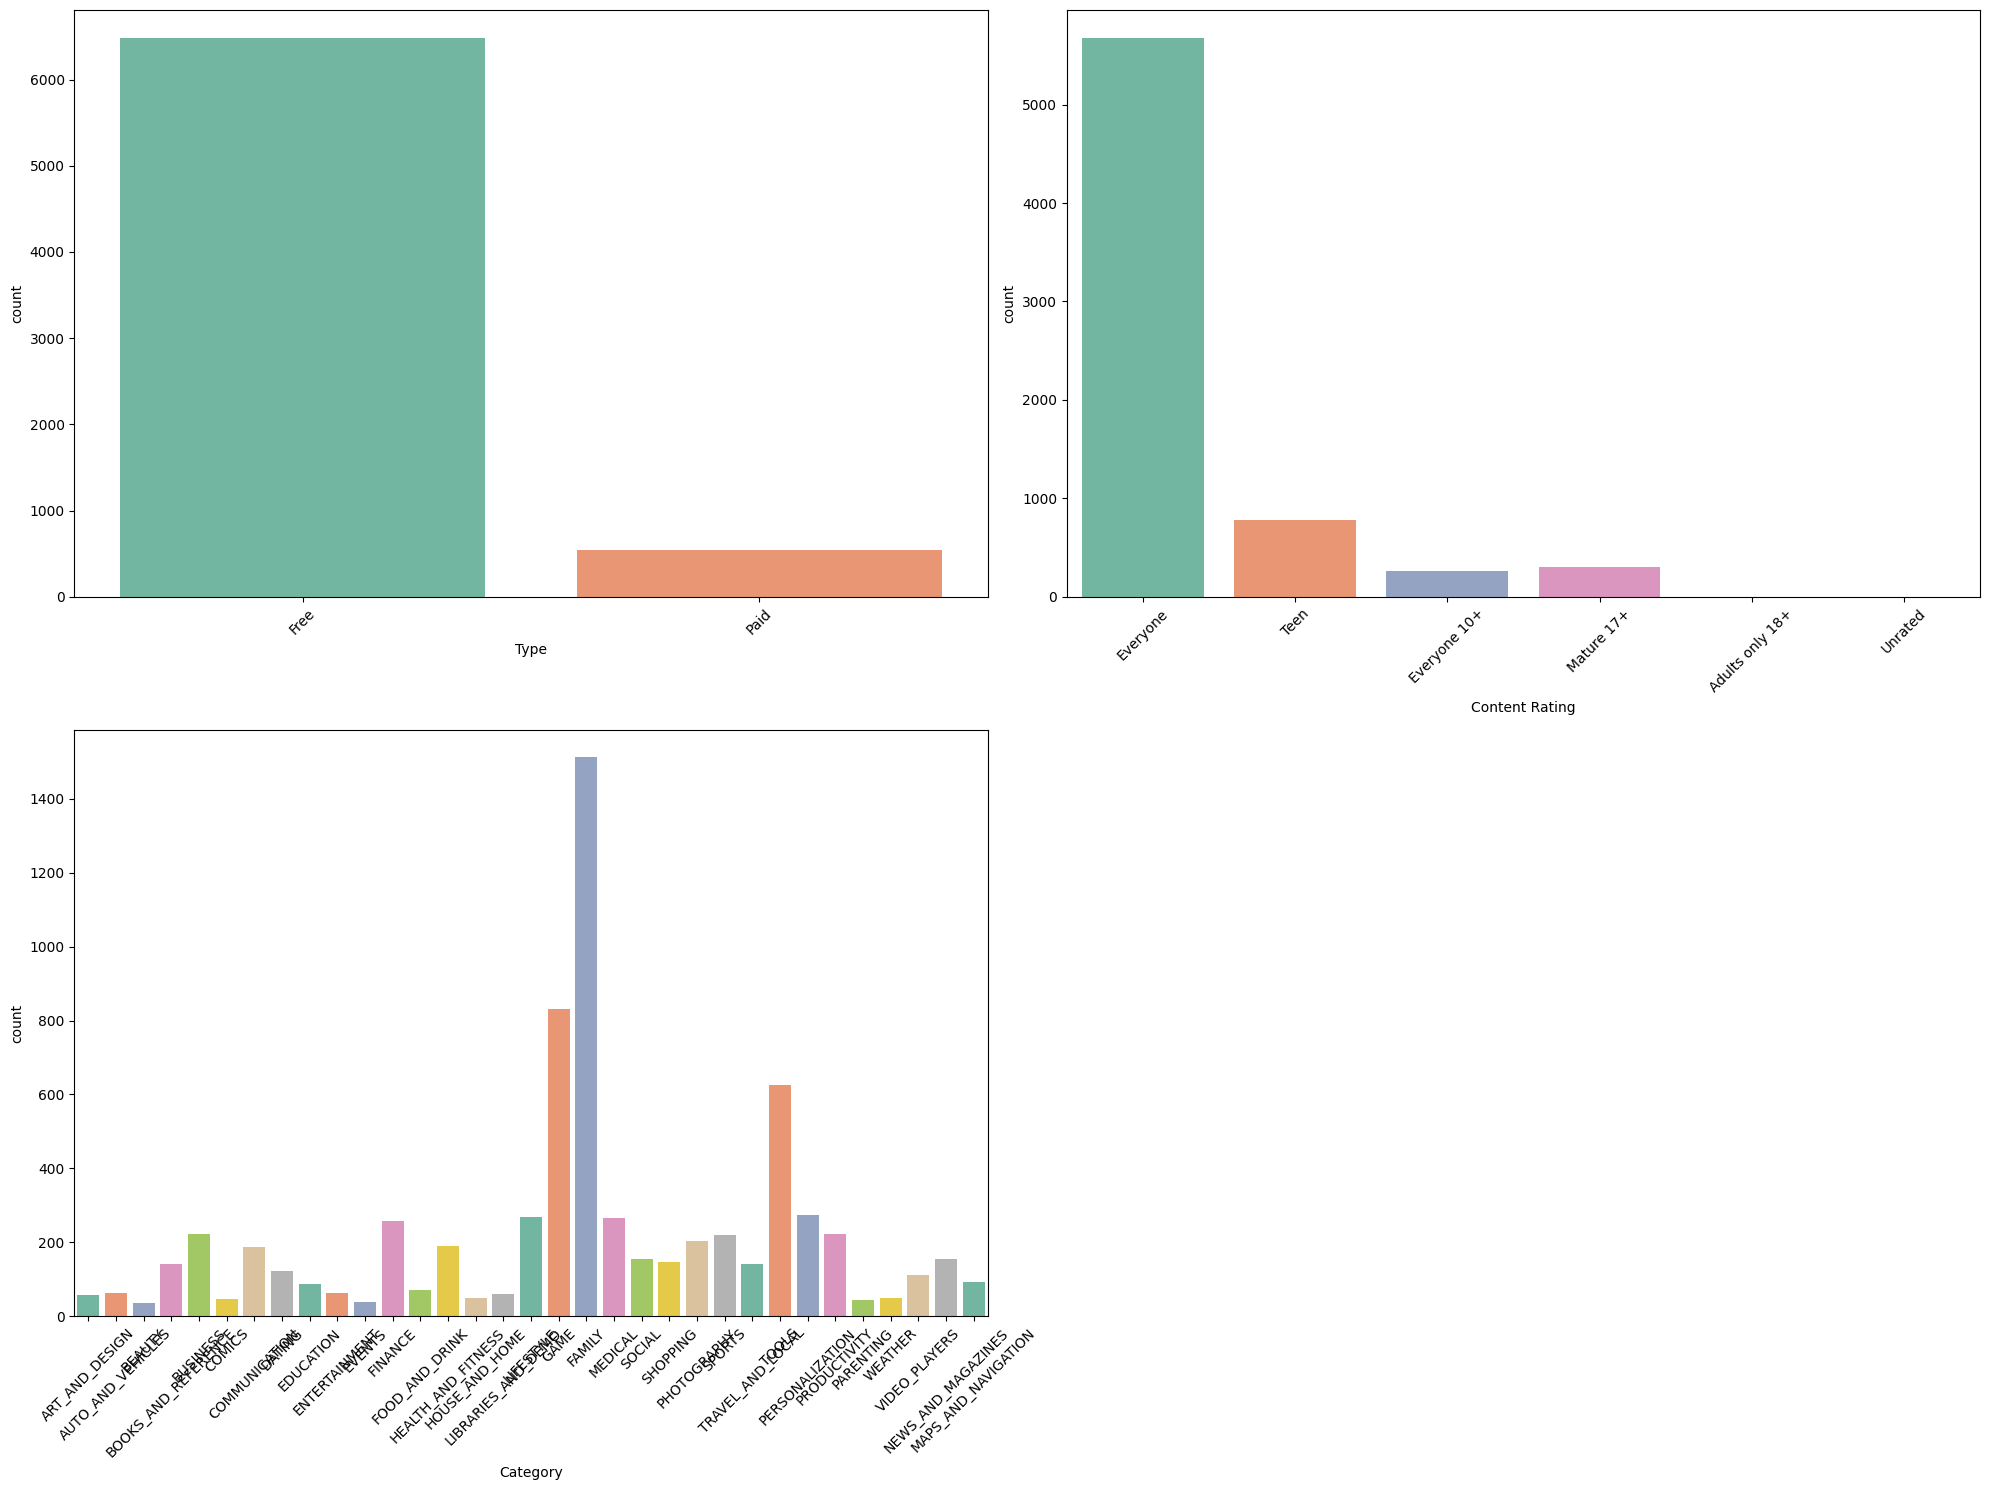

In [130]:
plt.figure(figsize=(20, 15))
Category=['Type','Content Rating','Category']
for i in range(0,len(Category)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=df1[Category[i]],palette="Set2")
  plt.xlabel(Category[i])
  plt.xticks(rotation=45)
  plt.tight_layout()
plt.show()

In [149]:
#which category has highest installation

In [151]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'day', 'month', 'year'],
      dtype='object')

In [152]:
df1.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,11532352717
1,FAMILY,3552661580
2,TOOLS,2879553500
3,COMMUNICATION,1817915530
4,PHOTOGRAPHY,1493893130
5,PRODUCTIVITY,1296302080
6,NEWS_AND_MAGAZINES,1190900550
7,PERSONALIZATION,895131930
8,VIDEO_PLAYERS,866662200
9,SPORTS,806311465


# Games App has highest Installation



---



In [154]:
#What is the distribution of app Ratings across the dataset?

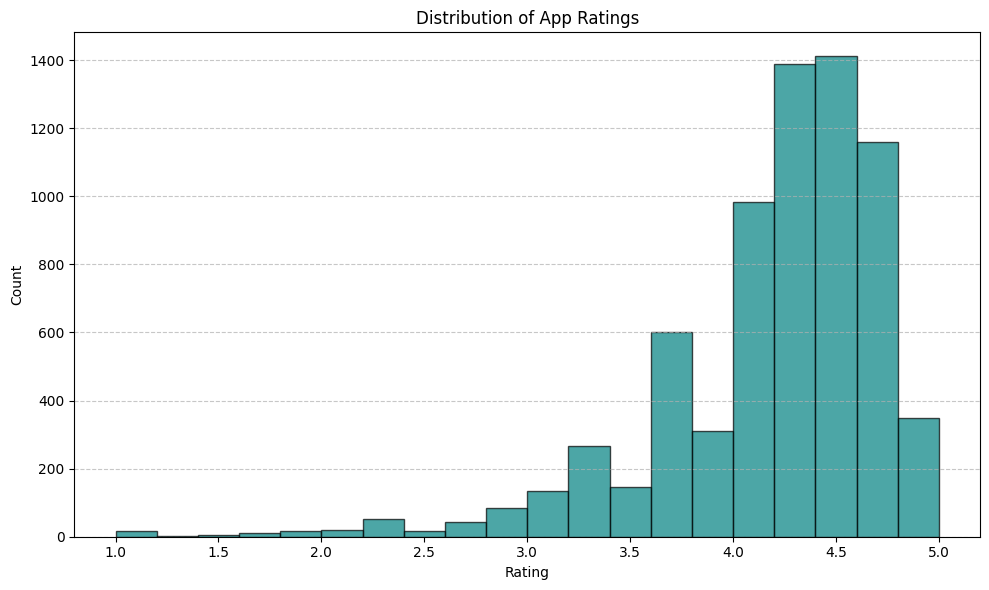

In [157]:
plt.figure(figsize=(10, 6))
plt.hist(df1['Rating'], bins=20, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of App Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Most apps have ratings concentrated in the higher range (above 4), indicating a generally positive user experience.



---



In [158]:
#Which Categories have the highest average Ratings?

In [160]:
average_ratings_by_category = df1.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
display(average_ratings_by_category)

,Rating
Category,
EVENTS,4.478947
ART_AND_DESIGN,4.381034
EDUCATION,4.373864
PARENTING,4.347727
PERSONALIZATION,4.324453
BOOKS_AND_REFERENCE,4.322695
BEAUTY,4.291892
SOCIAL,4.257692
WEATHER,4.242000


# The 'EVENTS', 'EDUCATION', and 'ART_AND_DESIGN' categories boast the highest average app ratings, suggesting high user satisfaction in these areas.



---



In [161]:
#How are Installs distributed across all apps?

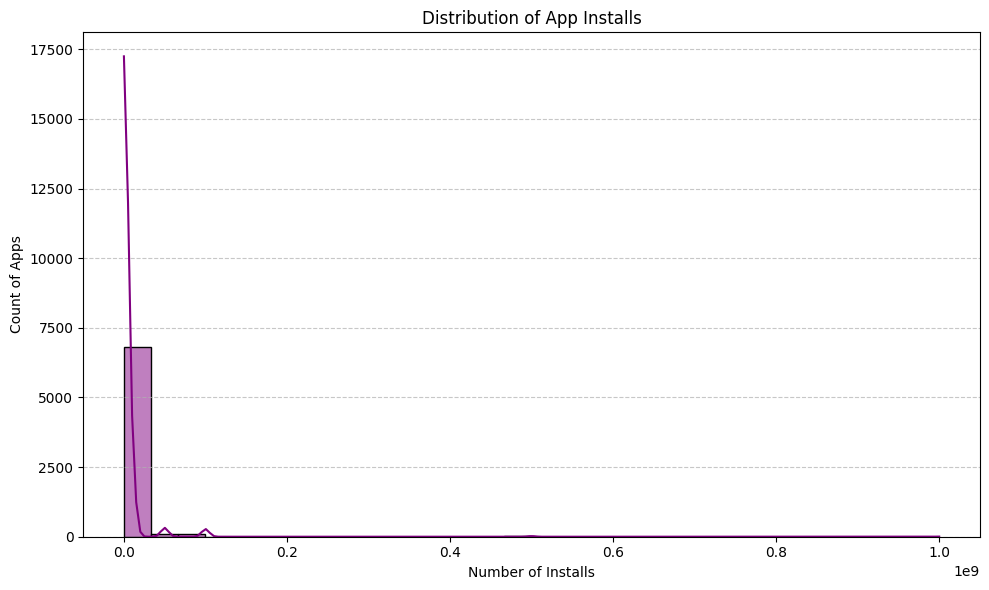

In [162]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Installs'], bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Count of Apps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The distribution of app installs is heavily skewed towards lower values, indicating that most apps have fewer installations.



---



In [163]:
#Which Categories have the highest total number of Installs?

In [165]:
total_installs_by_category = df1.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
display(total_installs_by_category)

,Installs
Category,
GAME,11532352717
FAMILY,3552661580
TOOLS,2879553500
COMMUNICATION,1817915530
PHOTOGRAPHY,1493893130
PRODUCTIVITY,1296302080
NEWS_AND_MAGAZINES,1190900550
PERSONALIZATION,895131930
VIDEO_PLAYERS,866662200


# The 'GAME' category has by far the highest total number of installs, significantly surpassing other categories like 'FAMILY' and 'TOOLS'.

In [166]:
#What is the distribution of Reviews among apps?

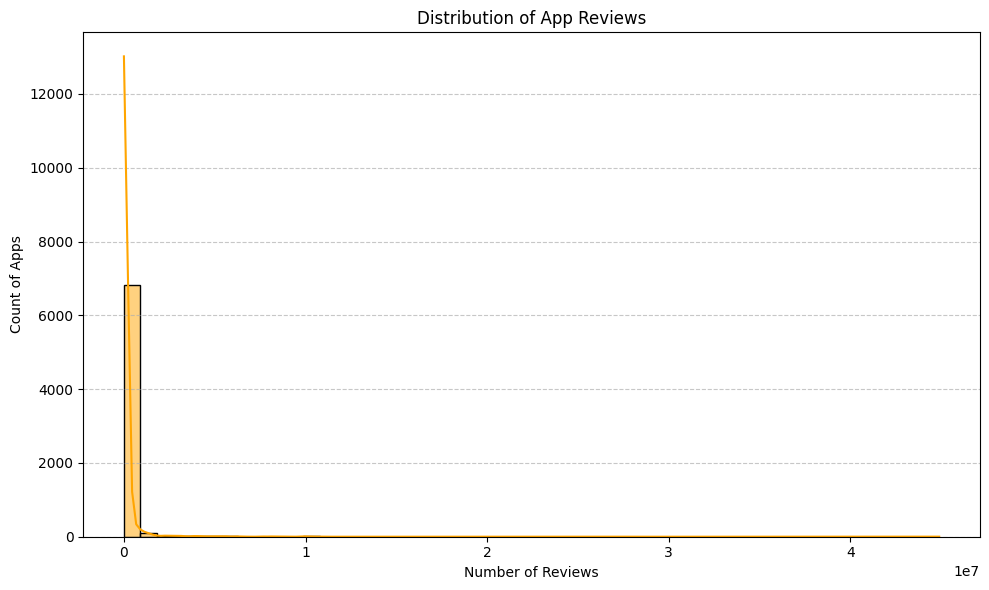

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Reviews'], bins=50, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of App Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count of Apps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The distribution of app reviews is heavily skewed towards lower values, indicating that most apps have a relatively small number of reviews.



---



In [177]:
#Is there a relationship between Reviews and Installs?
#Does higher Rating correlate with higher Installs?

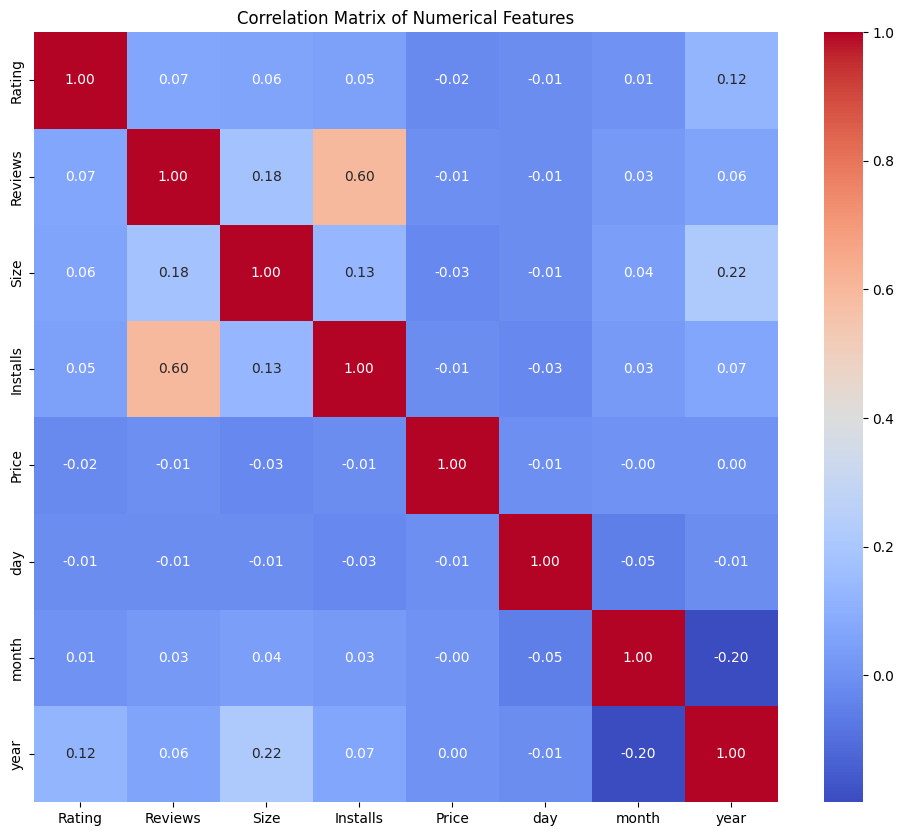

In [178]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# The heatmap reveals a strong positive correlation between 'Reviews' and 'Installs'. i.e. 0.60

# There is a weak positive correlation between 'Rating' and 'Installs', suggesting that higher ratings do not strongly guarantee a higher number of installations.



---



In [179]:
#What is the distribution of Price for Paid apps?

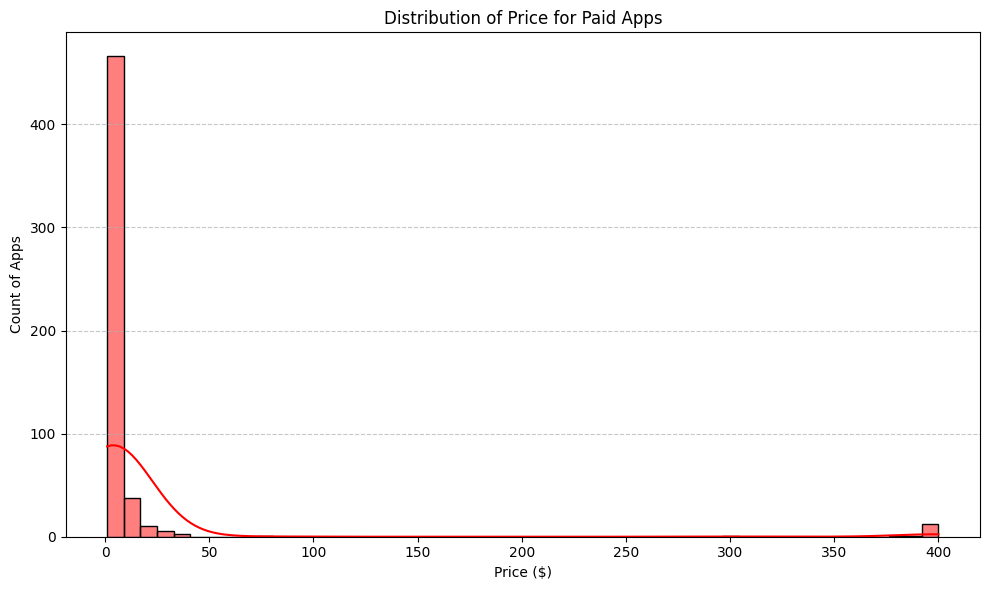

In [180]:
paid_apps_df = df1[df1['Type'] == 'Paid']

plt.figure(figsize=(10, 6))
sns.histplot(paid_apps_df['Price'], bins=50, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Price for Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count of Apps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#The distribution of prices for paid apps is heavily skewed towards lower prices, with a significant concentration of apps costing less than $10.



---



In [181]:
#Do Paid apps have higher average Ratings than Free apps?

In [182]:
average_rating_paid = df1[df1['Type'] == 'Paid']['Rating'].mean()
average_rating_free = df1[df1['Type'] == 'Free']['Rating'].mean()

display(f"Average Rating for Paid Apps: {average_rating_paid:.2f}")
display(f"Average Rating for Free Apps: {average_rating_free:.2f}")

'Average Rating for Paid Apps: 4.24'

'Average Rating for Free Apps: 4.15'

#Paid apps generally have a slightly higher average rating than free apps, suggesting a potential correlation between app quality and price.



---



In [183]:
#Which Content Rating group has the highest average Installs?

In [184]:
average_installs_by_content_rating = df1.groupby('Content Rating')['Installs'].mean().sort_values(ascending=False)
display(average_installs_by_content_rating)

,Installs
Content Rating,
Everyone 10+,1.104068e+07
Teen,7.815239e+06
Everyone,3.788856e+06
Mature 17+,3.098127e+06
Adults only 18+,7.500000e+05
Unrated,5.000000e+04


#The 'Adults only 18+' content rating group shows the highest average number of installations, followed by 'Everyone'.